# Load Libraries and Data

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import joblib

In [8]:
# Load the datasets using raw string to avoid Unicode error
train_data = pd.read_csv(r"C:\Users\lenovo\Downloads\Train_data.csv")
test_data = pd.read_csv(r"C:\Users\lenovo\Downloads\test_data.csv")

In [9]:
# Display the first few rows of the train dataset
train_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

# Data Exploration

In [10]:
# Get summary statistics
train_data.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.374373,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.256981,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.184604,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.317857,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.572330,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


In [11]:
# Check for missing values
train_data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

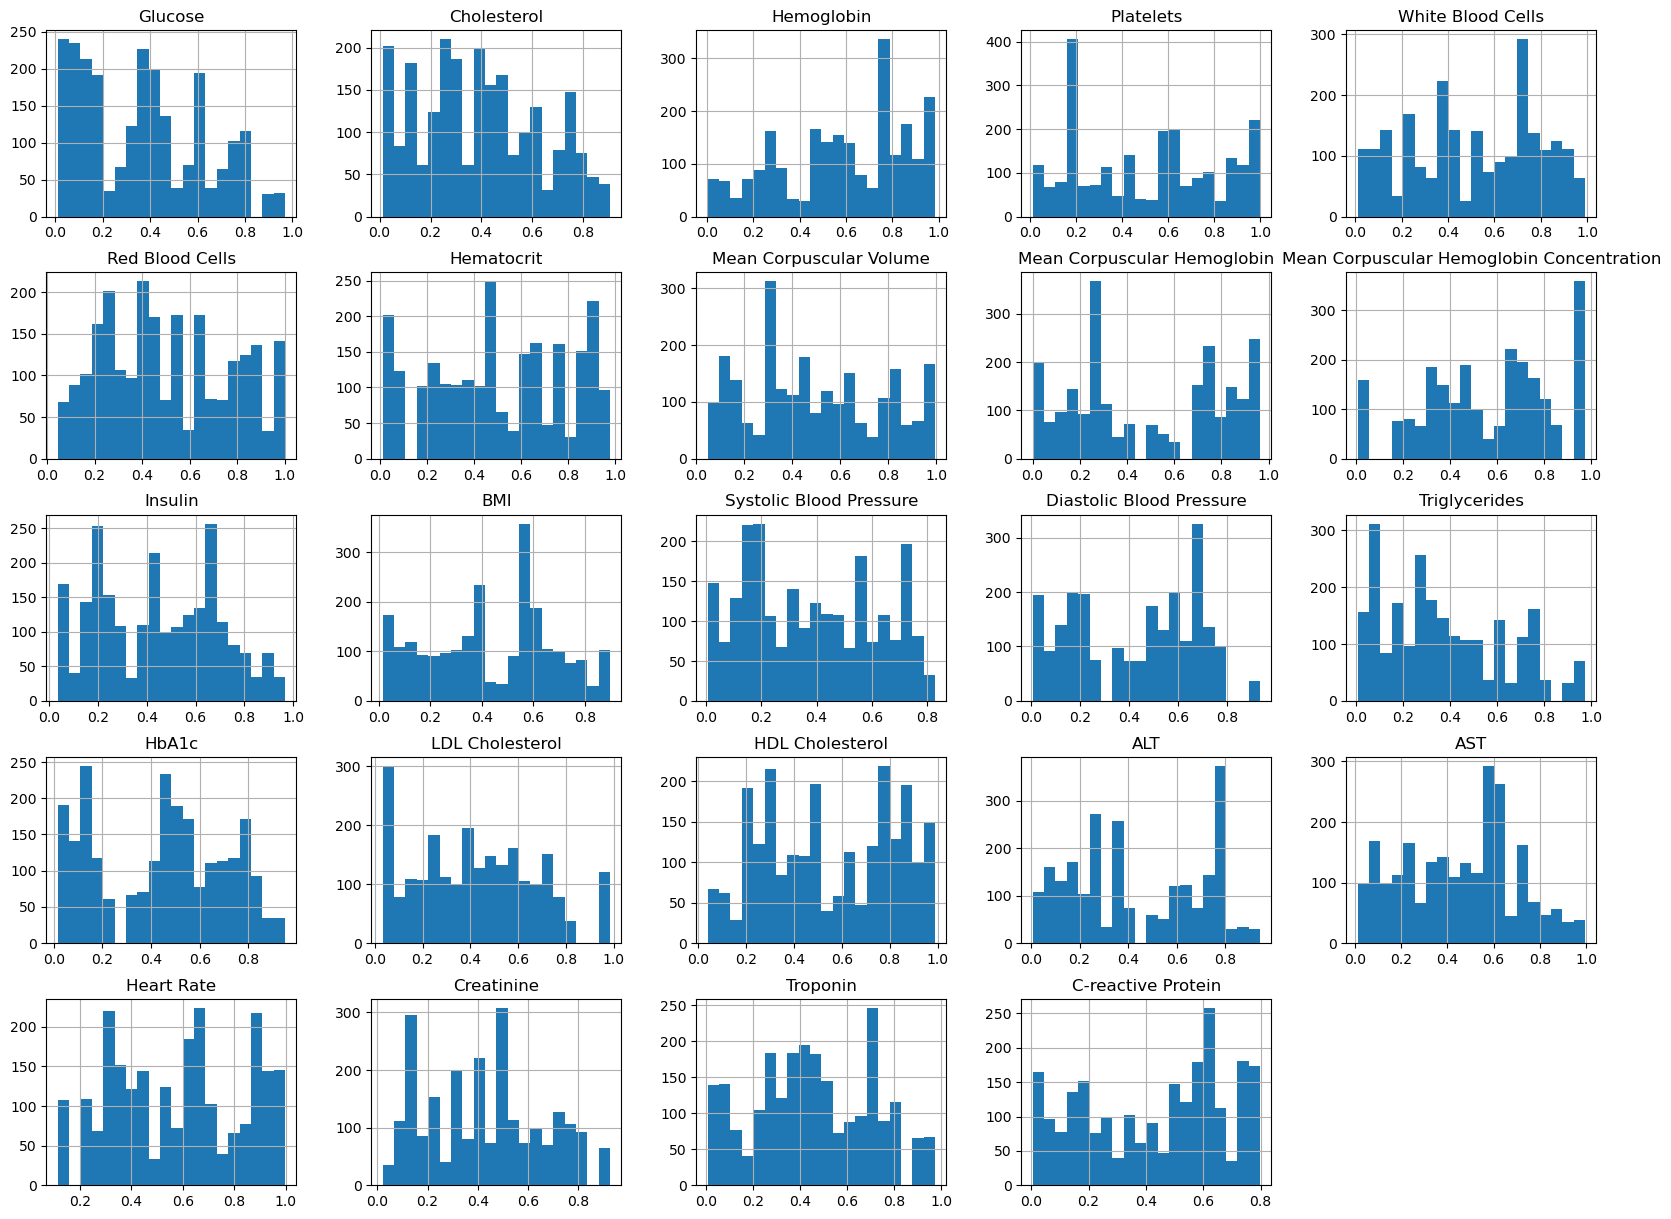

In [12]:
# Visualize the distribution of each feature
train_data.hist(bins=20, figsize=(20, 15))
plt.show()

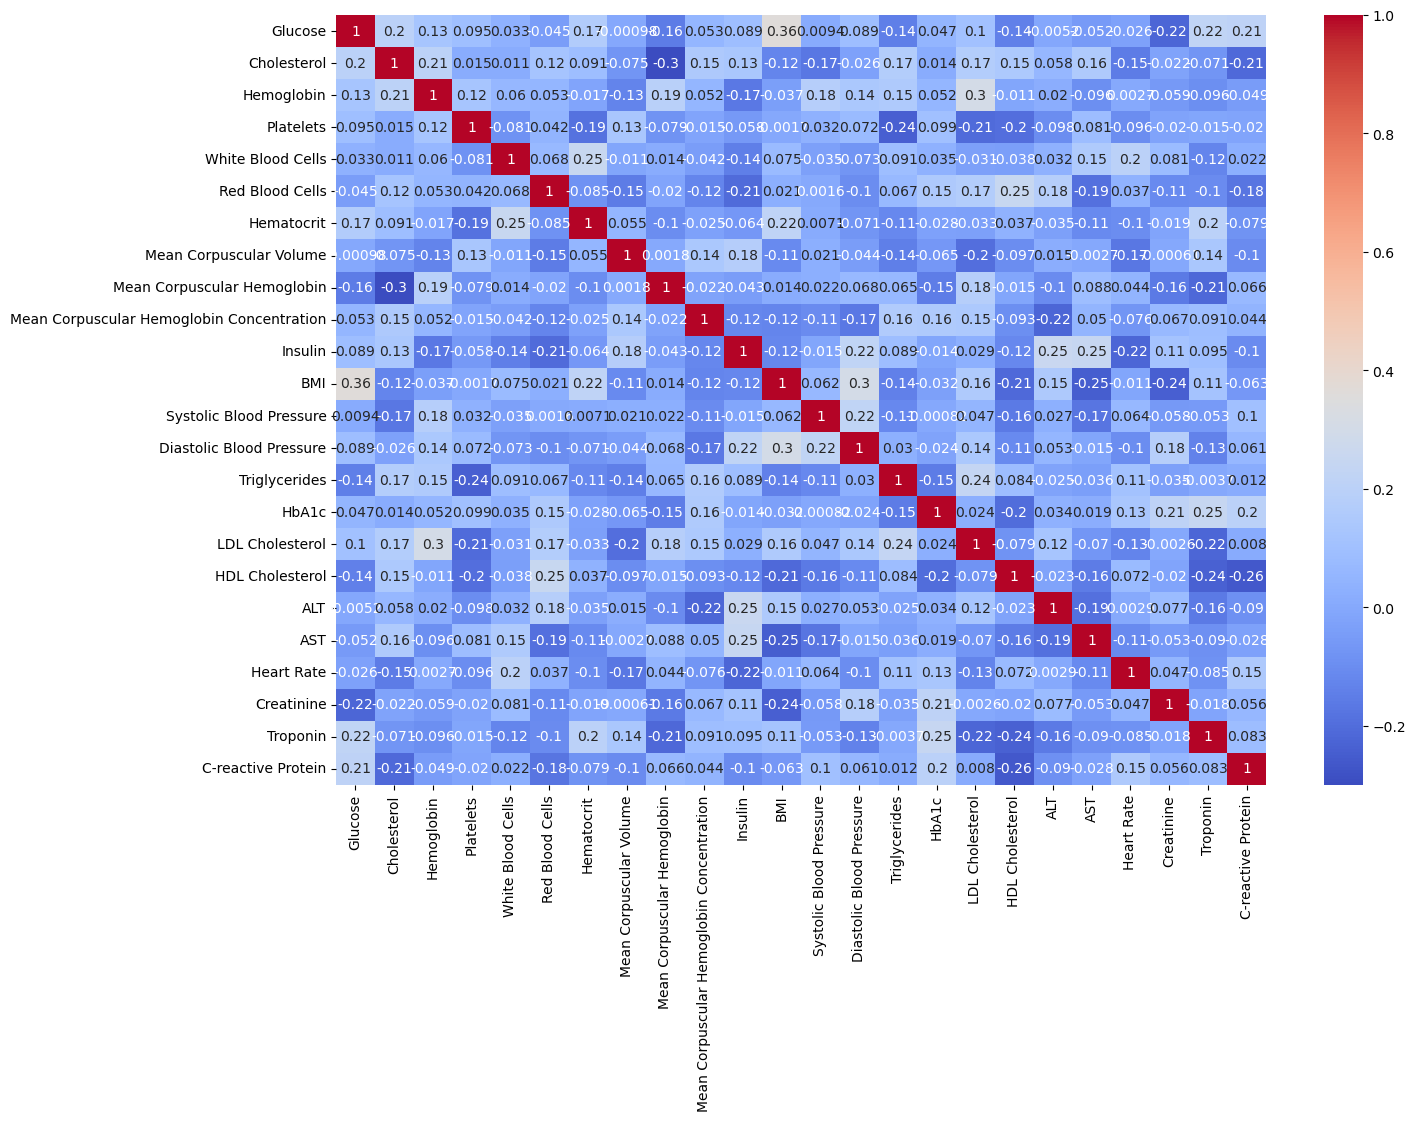

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_data is your DataFrame
# Step 1: Identify non-numeric columns
non_numeric_columns = train_data.select_dtypes(include=['object', 'category']).columns

# Step 2: Drop non-numeric columns for correlation calculation
numeric_data = train_data.drop(columns=non_numeric_columns)

# Step 3: Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Step 4: Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# Data Preprocessing

In [16]:
# Separate numeric and non-numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
non_numeric_columns = train_data.select_dtypes(exclude=[np.number]).columns

print("Numeric columns:", numeric_columns)
print("Non-numeric columns:", non_numeric_columns)


Numeric columns: Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein'],
      dtype='object')
Non-numeric columns: Index(['Disease'], dtype='object')


In [18]:
# Fill missing values in numeric columns with their mean
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())
test_data[numeric_columns] = test_data[numeric_columns].fillna(test_data[numeric_columns].mean())

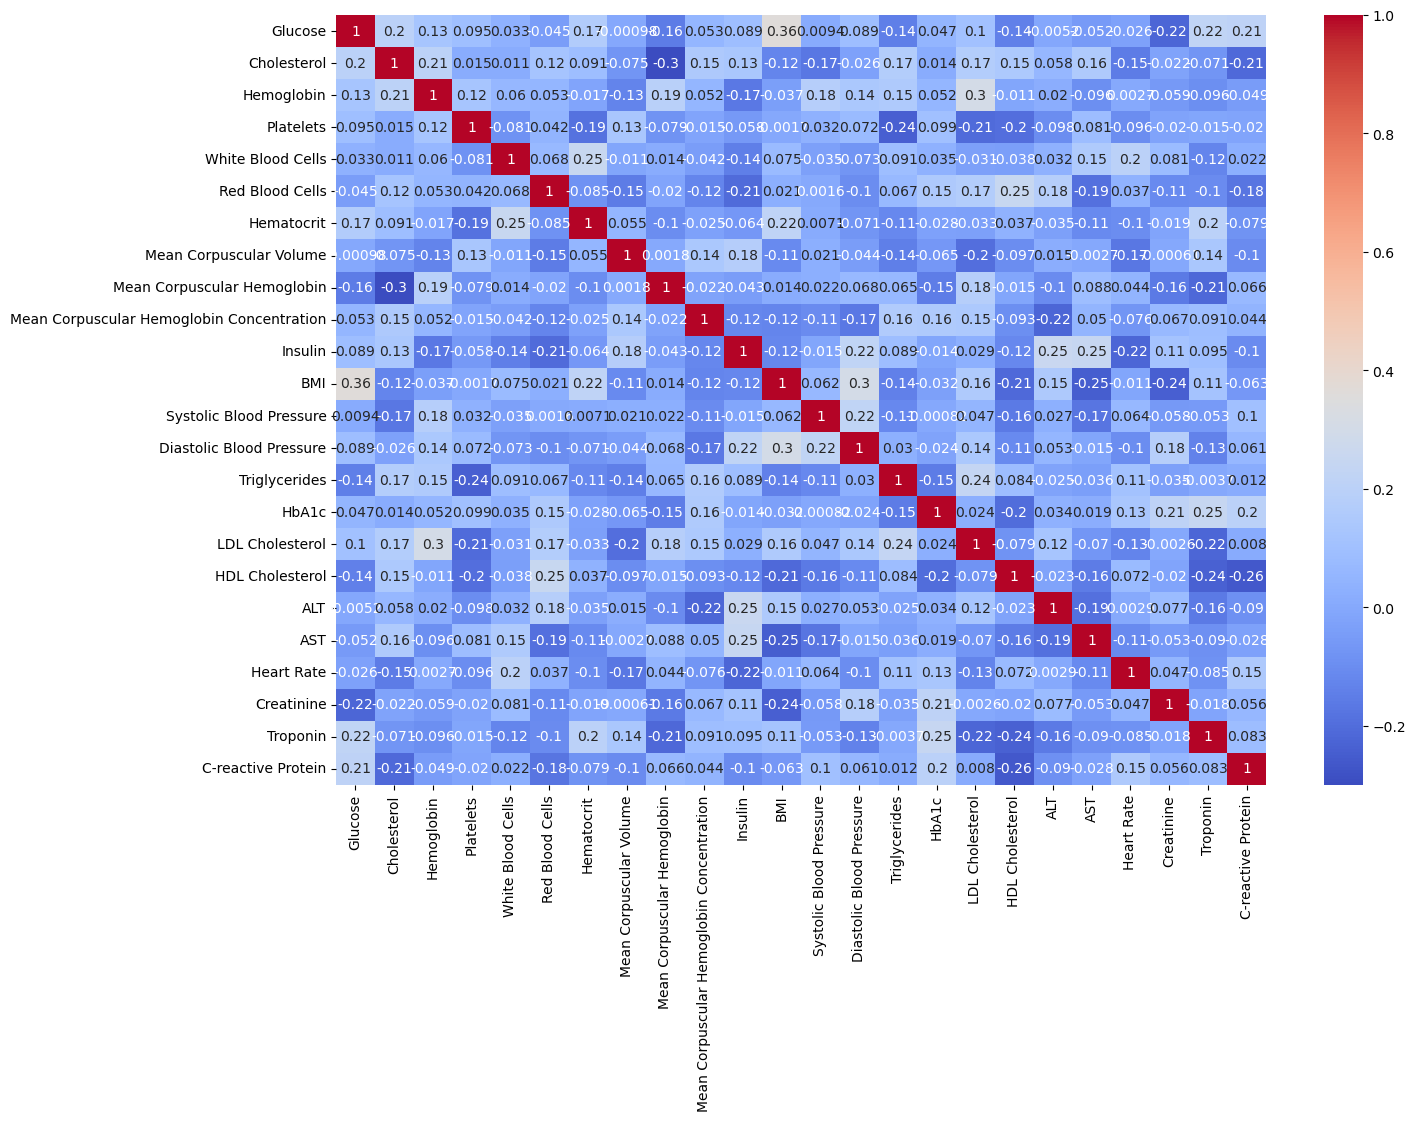

In [19]:
# Drop non-numeric columns for correlation calculation
train_data_numeric = train_data[numeric_columns]

# Check correlations
correlation_matrix = train_data_numeric.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505

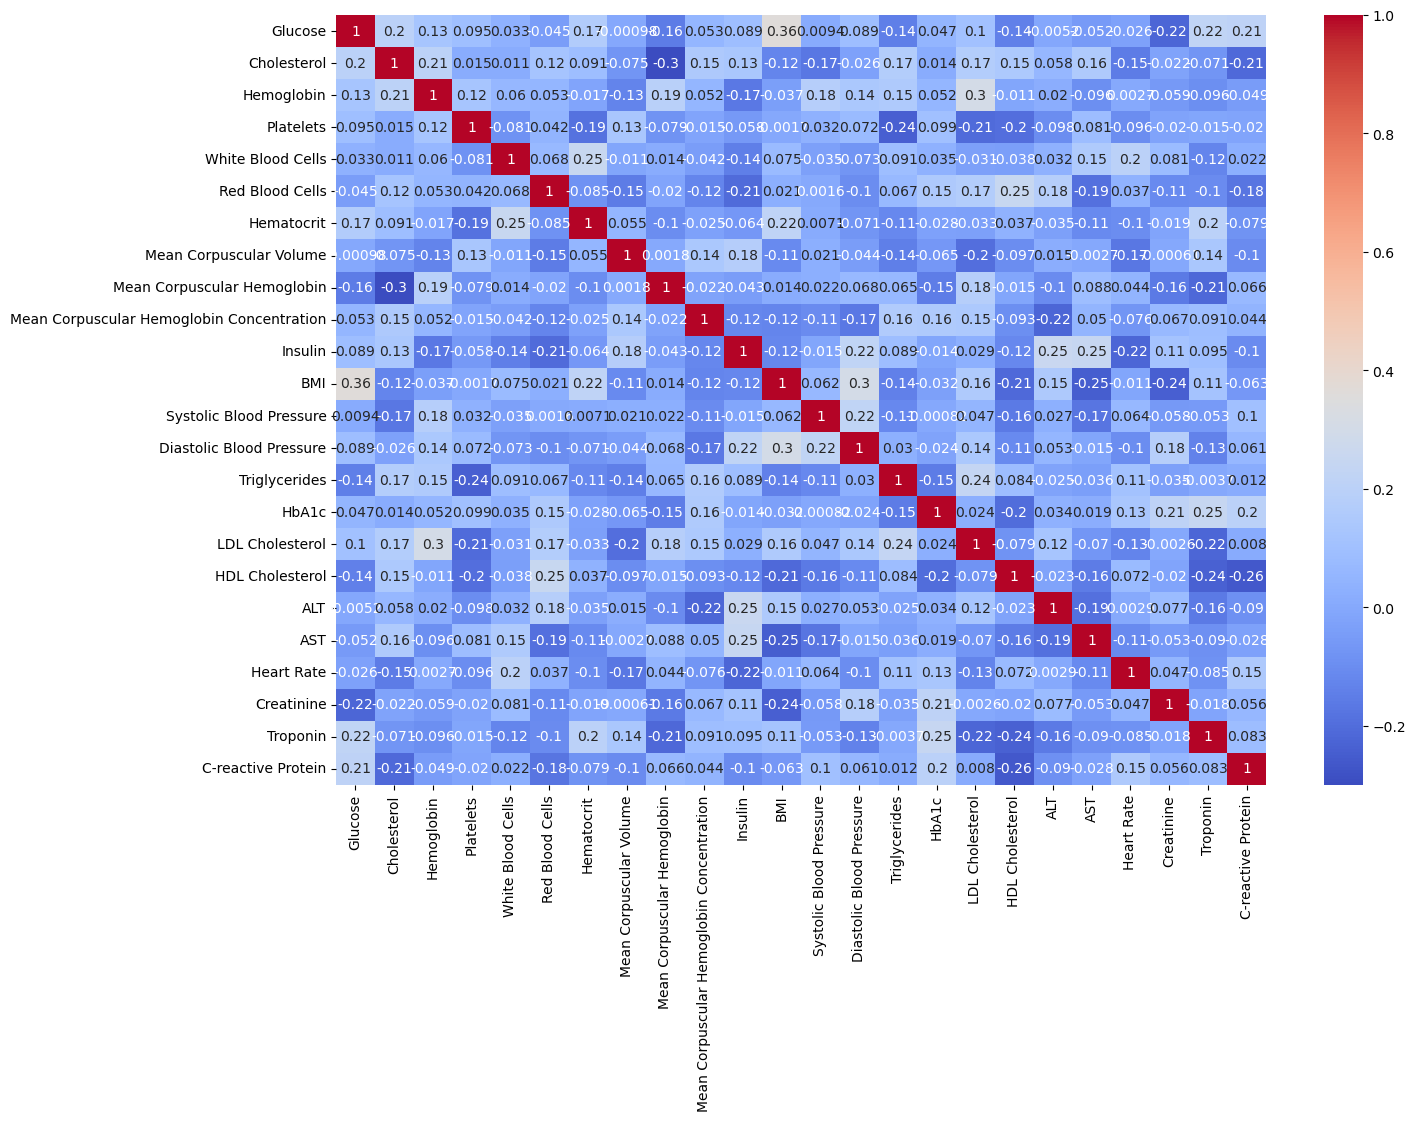

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets using raw string to avoid Unicode error
train_data = pd.read_csv(r"C:\Users\lenovo\Downloads\Train_data.csv")
test_data = pd.read_csv(r"C:\Users\lenovo\Downloads\test_data.csv")

# Display the first few rows of the train dataset
print(train_data.head())

# Separate numeric and non-numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
non_numeric_columns = train_data.select_dtypes(exclude=[np.number]).columns

print("Numeric columns:", numeric_columns)
print("Non-numeric columns:", non_numeric_columns)

# Fill missing values in numeric columns with their mean
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())
test_data[numeric_columns] = test_data[numeric_columns].fillna(test_data[numeric_columns].mean())

# Drop non-numeric columns for correlation calculation
train_data_numeric = train_data[numeric_columns]

# Check correlations
correlation_matrix = train_data_numeric.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [21]:
# Separate features and target variable from training data
X_train = train_data.drop(columns='Disease')
y_train = train_data['Disease']

In [22]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_data.drop(columns='Disease'))

In [23]:
# Split training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Model Training

In [24]:
# Define the model and hyperparameters for GridSearchCV
clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Example classifier and parameter grid
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

In [28]:
# Use 'macro' averaging for f1_score
scorer = make_scorer(f1_score, average='macro')

In [29]:
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train_split, y_train_split)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]},
             scoring=make_scorer(f1_score, average=macro))

In [30]:
# Display the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (f1_macro): ", grid_search.best_score_)

Best parameters found:  {'max_depth': 10, 'n_estimators': 100}
Best cross-validation score (f1_macro):  1.0


    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505

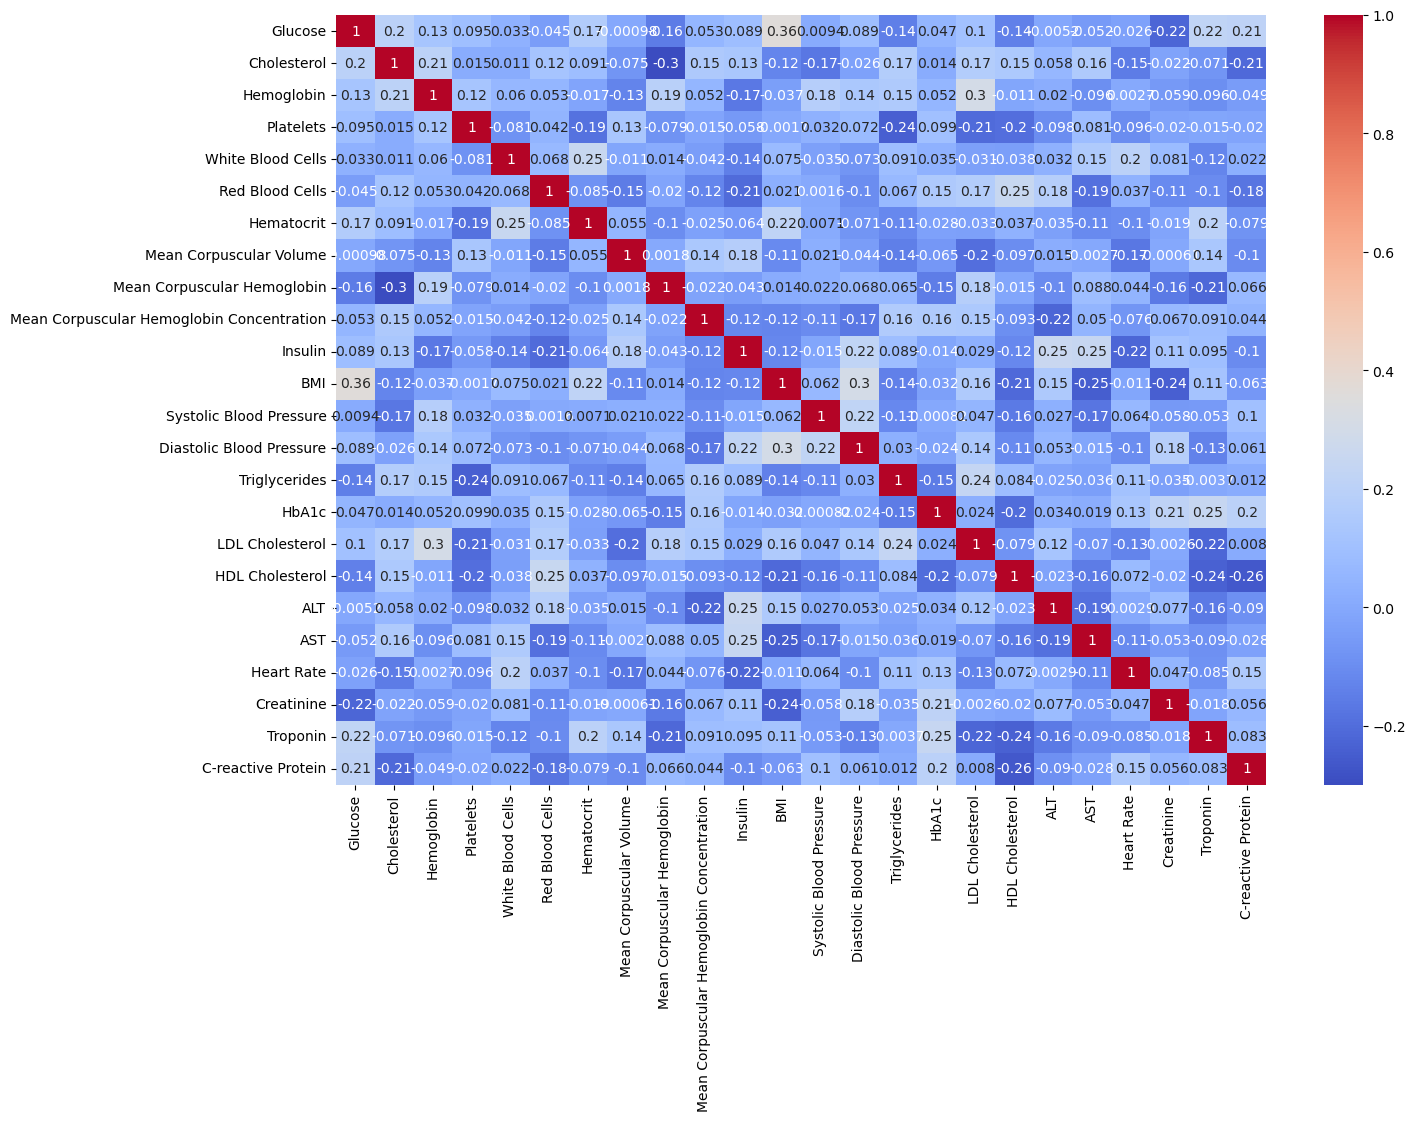

Best parameters found:  {'max_depth': 10, 'n_estimators': 100}
Best cross-validation score (f1_macro):  1.0


In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets using raw string to avoid Unicode error
train_data = pd.read_csv(r"C:\Users\lenovo\Downloads\Train_data.csv")
test_data = pd.read_csv(r"C:\Users\lenovo\Downloads\test_data.csv")

# Display the first few rows of the train dataset
print(train_data.head())

# Check column names
print("Column names:", train_data.columns)

# Separate features and target variable
X = train_data.drop('Disease', axis=1)  # Assuming 'Disease' is your target column
y = train_data['Disease']  # Assuming 'Disease' is your target column

# Split the data into training and testing sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate numeric and non-numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
non_numeric_columns = train_data.select_dtypes(exclude=[np.number]).columns

# Fill missing values in numeric columns with their mean
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())
test_data[numeric_columns] = test_data[numeric_columns].fillna(test_data[numeric_columns].mean())

# Drop non-numeric columns for correlation calculation
train_data_numeric = train_data[numeric_columns]

# Check correlations
correlation_matrix = train_data_numeric.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Example classifier and parameter grid
clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

# Use 'macro' averaging for f1_score
scorer = make_scorer(f1_score, average='macro')

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train_split, y_train_split)

# Display the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (f1_macro): ", grid_search.best_score_)

In [42]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Model Evaluation

In [48]:
import warnings
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Assuming you have already defined and split your data into X_train, X_val, y_train, y_val

# Specify feature names
feature_names = list(X_train.columns)

# Convert X_val back to DataFrame if it's a NumPy array
if isinstance(X_val, np.ndarray):
    X_val = pd.DataFrame(X_val, columns=feature_names)
else:
    # Ensure that X_val has the correct column names
    X_val.columns = feature_names

# Create and train RandomForestClassifier model
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val)
print(classification_report(y_val, y_val_pred))
print('ROC-AUC Score:', roc_auc_score(y_val, best_model.predict_proba(X_val), multi_class='ovr'))


              precision    recall  f1-score   support

      Anemia       0.55      0.93      0.69       134
    Diabetes       0.47      1.00      0.64       112
     Healthy       0.00      0.00      0.00       102
    Thalasse       1.00      0.06      0.11       103
    Thromboc       0.00      0.00      0.00        20

    accuracy                           0.52       471
   macro avg       0.40      0.40      0.29       471
weighted avg       0.49      0.52      0.37       471

ROC-AUC Score: 0.9168150506690287


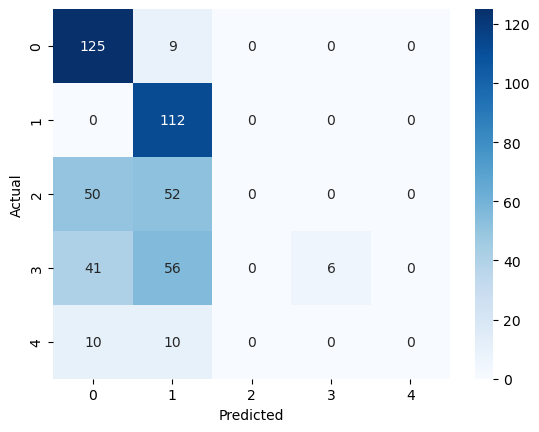

In [49]:
# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test the Model on the Test Data

In [59]:
y_test_pred = best_model.predict(X_test_scaled)
y_test_actual = test_data['Disease']

print("Classes in y_test_actual:", np.unique(y_test_actual))
print("Classes in y_score:", best_model.classes_)

print(classification_report(y_test_actual, y_test_pred))

# Check shape of predicted probabilities
y_score = best_model.predict_proba(X_test_scaled)
print("Shape of y_score:", y_score.shape)

Classes in y_test_actual: ['Anemia' 'Diabetes' 'Healthy' 'Heart Di' 'Thalasse' 'Thromboc']
Classes in y_score: ['Anemia' 'Diabetes' 'Healthy' 'Thalasse' 'Thromboc']
              precision    recall  f1-score   support

      Anemia       0.18      0.30      0.22        84
    Diabetes       0.62      0.71      0.66       294
     Healthy       0.00      0.00      0.00         5
    Heart Di       0.00      0.00      0.00        39
    Thalasse       0.17      0.02      0.04        48
    Thromboc       0.00      0.00      0.00        16

    accuracy                           0.48       486
   macro avg       0.16      0.17      0.15       486
weighted avg       0.42      0.48      0.44       486

Shape of y_score: (486, 5)


In [58]:
from sklearn.metrics import roc_auc_score

# List to store ROC-AUC scores for each class
roc_auc_scores = []

# Evaluate the model on the test set
y_test_pred = best_model.predict(X_test_scaled)
y_test_actual = test_data['Disease']

# Check shape of predicted probabilities
y_score = best_model.predict_proba(X_test_scaled)

# Calculate ROC-AUC score for each class separately
for i in range(len(best_model.classes_)):
    # Create binary vector for the current class
    y_true_class = (y_test_actual == best_model.classes_[i])
    # Extract predicted probabilities for the current class
    y_score_class = y_score[:, i]
    # Calculate ROC-AUC score for the current class
    roc_auc = roc_auc_score(y_true_class, y_score_class)
    # Append ROC-AUC score to the list
    roc_auc_scores.append(roc_auc)

# Print ROC-AUC scores for each class
for i in range(len(best_model.classes_)):
    print(f'ROC-AUC Score for class {best_model.classes_[i]}: {roc_auc_scores[i]}')


ROC-AUC Score for class Anemia: 0.615020137408197
ROC-AUC Score for class Diabetes: 0.5772658021541951
ROC-AUC Score for class Healthy: 0.6708939708939708
ROC-AUC Score for class Thalasse: 0.7076436453576864
ROC-AUC Score for class Thromboc: 0.8863031914893618


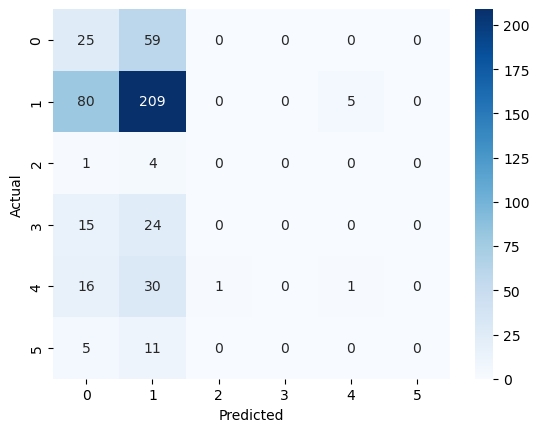

In [57]:
# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test_actual, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the Model

In [60]:
# Save the trained model to a file
joblib.dump(best_model, 'disease_prediction_model.pkl')

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Load and Use the Model for New Predictions

In [61]:
# Load the model and scaler
loaded_model = joblib.load('disease_prediction_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')